<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Analise-de-lojas-de-varejo/blob/main/An%C3%A1lise_de_varejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Varejo**

# **1 - Conhecendo os dados**

São 3 datasets diferentes: Features, sales_date e stores.
Renomearemos sempre que necessário para facilitar o manuseio dos dados.
[Sobre o módulo calendar](https://www.logicus.com.br/alguns-exemplos-de-uso-de-calendario-com-python/)

In [1]:
#importando as bibliotecas necessárias
import numpy as np #operações e manipulações com dados
import pandas as pd #operações e manipulações com dados
import seaborn as sns #visualização dos dados
import matplotlib.pyplot as plt #visualização dos dados
import matplotlib.dates as mdates

import calendar, datetime

##carregando os arquivos já modificados

In [ ]:
vendas.to_csv('vendas.csv')
lojas.to_csv('lojas.csv')
features.to_csv('features.csv')

NameError: ignored

In [4]:
vendas = pd.read_csv('/content/drive/MyDrive/Portfólio/Análise de Varejo/vendas .csv')
lojas = pd.read_csv('/content/drive/MyDrive/Portfólio/Análise de Varejo/lojas.csv')
features = pd.read_csv('/content/drive/MyDrive/Portfólio/Análise de Varejo/features.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **data set features**

In [2]:
features = pd.read_csv("/content/drive/MyDrive/Portfólio/Análise de Varejo/archive/Features data set.csv") 

print(f'{features.shape[0]} linhas e {features.shape[1]} colunas')

features.head()

8190 linhas e 12 colunas


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Vamos renomear as colunas par nomes em português.


* Store - é a identificação da loja, ->loja.
* Date - data da semana, -> Data
* Temperature - temperatura na região,-> Temperatura
* Fuel_Price - preço do combustível na região, -> preço do combustível
* MarkDown1-5 -dados de descontos disponíveis a partir de 2011 e não o tempo todo nem para toda loja, valores ausentes marcados com NaN, -> Descontos
* CPI - consumer price index - índice de inplação no Brasil temos o IPCA- Índice Nacional de Preços ao COnsumidor amplo. -> IPC
* Unemployment - Taxa de Desemprego, -> desemprego
* IsHoliday - se na semana tem algum feriado importante,-> feriado

In [3]:
col_feat={'Store': "loja", 'Date': 'data', 'Temperature':'temperatura', 'Fuel_Price':'preco_combustivel', 'MarkDown1':'desc_1', 'MarkDown2':'desc_2',
       'MarkDown3':'desc_3','MarkDown4':"desc_4",'MarkDown5':'desc_5','MarkDown6':'desc_6', 'CPI':'IPC', 'Unemployment':'desemprego',
       'IsHoliday': 'feriado'}
features.rename(columns=col_feat, inplace=True)

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loja               8190 non-null   int64  
 1   data               8190 non-null   object 
 2   temperatura        8190 non-null   float64
 3   preco_combustivel  8190 non-null   float64
 4   desc_1             4032 non-null   float64
 5   desc_2             2921 non-null   float64
 6   desc_3             3613 non-null   float64
 7   desc_4             3464 non-null   float64
 8   desc_5             4050 non-null   float64
 9   IPC                7605 non-null   float64
 10  desemprego         7605 non-null   float64
 11  feriado            8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Nas células acima notamos que:
* a data está como object e precisamos passar para o formato de data
* e há vários valores nulos, into é, os valores não nulos são diferentes em cada coluna.

In [5]:
#valores faltantes
features.isna().sum()

loja                    0
data                    0
temperatura             0
preco_combustivel       0
desc_1               4158
desc_2               5269
desc_3               4577
desc_4               4726
desc_5               4140
IPC                   585
desemprego            585
feriado                 0
dtype: int64

In [6]:
#transformando os valores de data de object para formato de data
features['data'] = pd.to_datetime(features['data'])

features.data #está no formato datetime 

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
8185   2013-06-28
8186   2013-05-07
8187   2013-12-07
8188   2013-07-19
8189   2013-07-26
Name: data, Length: 8190, dtype: datetime64[ns]

In [7]:
features.describe()

,loja,temperatura,preco_combustivel,desc_1,desc_2,desc_3,desc_4,desc_5,IPC,desemprego
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Com a função describe() conseguimos obter algumas informações do data set
* total de 45 lojas
* média de temperatura em 23 graus (não sei se a escala é em ºF ou ºC
* Preço do combustível variou de 2,47 a 4,46 entre as regiões no perríodo 
* inflação foi de 126 a 228,9 no período
* taxa de desemprego variou de 3,68 a 14,31 com média de 7,826 no período

## **data set vendas**

In [8]:
vendas = pd.read_csv('/content/drive/MyDrive/Portfólio/Análise de Varejo/archive/sales data-set.csv')
print(f'{vendas.shape[0]} linhas e {vendas.shape[1]} colunas')
vendas.head()

421570 linhas e 5 colunas


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Faremos renomeação para o português também. Temos que tomar o cuidado de fazer a mesma alteração para manter a relação entre os data sets.
A novidade aqui são:
* a variável 'Weekly_sales' - Venda semanal em determinado departamento em determinada loja, -> vendas_semanal
* Dept é o departamento em determinada loja, manteremos Dept


In [9]:
vendas.rename(columns = {'Weekly_Sales':'vendas_semanal','Store': "loja",'IsHoliday': 'feriado', 'Date':'data'}, inplace = True)

In [10]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loja            421570 non-null  int64  
 1   Dept            421570 non-null  int64  
 2   data            421570 non-null  object 
 3   vendas_semanal  421570 non-null  float64
 4   feriado         421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Obervamos que não valores nulos no dataset de vendas pois os números de colunas totais e non-null coincidem. Mas notamos que a data está como object e será melhor alterar isso também.

In [11]:
vendas['data'] = pd.to_datetime(vendas.data)
vendas.data #está no formato de data

0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
            ...    
421565   2012-09-28
421566   2012-05-10
421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: data, Length: 421570, dtype: datetime64[ns]

In [12]:
vendas.describe()

,loja,Dept,vendas_semanal
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Observamos que:
* há 99 departamentos diferentes nas lojas (não necessariamente em todas há os 99)
* As vendas variam de -4988,94 a 693099 por semana, isso quer dizer que há pelo menos uma semana operou em prejuízo. 

## **data set lojas**

In [13]:
lojas = pd.read_csv('/content/drive/MyDrive/Portfólio/Análise de Varejo/archive/stores data-set.csv')

print(f'{lojas.shape[0]} linhas e {lojas.shape[1]} colunas')

lojas.head()

45 linhas e 3 colunas


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


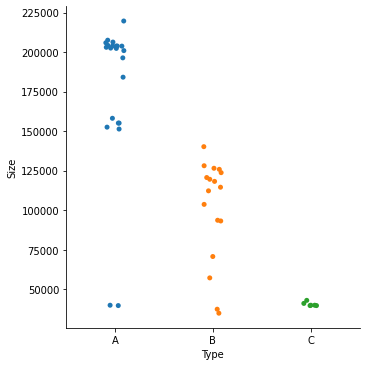

In [14]:
sns.catplot(x='Type',y='Size', data=lojas)

* Type é o Tipo de loja que pode ser A, B ou C, -> tipo 
* Size é o tamanho da loja, acredito que em metros quadrados, pelo gráfico notamos que o tipo de loja deva ter relação com o tamanho da loja ->tamanho

In [15]:
lojas.rename(columns={'Store':'loja', 'Type':"tipo",'Size':'tamanho'}, inplace=True)

In [16]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   loja     45 non-null     int64 
 1   tipo     45 non-null     object
 2   tamanho  45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [17]:
lojas.describe()

,loja,tamanho
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


# **2 - Visualização dos Dados**

Usaremos o histograma do matplotlib, dúvidas consulte a [biblioteca.](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

## **2.1 - Vendas semanais para cada loja**

In [21]:
vendas.info()
#vendas.data = pd.to_datetime(vendas.data)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   loja            421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   data            421570 non-null  datetime64[ns]
 3   vendas_semanal  421570 non-null  float64       
 4   feriado         421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   loja            421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   data            421570 non-null  datetime64[ns]
 3   vendas_semanal  421570 non-null  float64       
 4   feriado

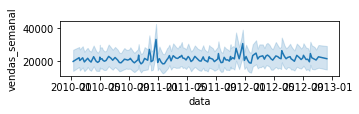

In [23]:
a = vendas[vendas['loja'] == 1]

plt.figure(figsize=(5,1))
#ax =a.plot(x='data', y='vendas_semanal',kind='bar', color=['black'] )
sns.lineplot(x='data',y='vendas_semanal', data=a, palette='gray')
# ax.set_yscale('log') #tentei com 'linear' e a melhor visualização foi com log
#ax.set_xscale('log')
#ax.set_ylim(1,1e3)
#ax.set_xlim(5e2,1e6)
#para evitar que os gráfico fiquem nesse formato optou-se por colocar em escalar logaritmica

ValueError: ignored

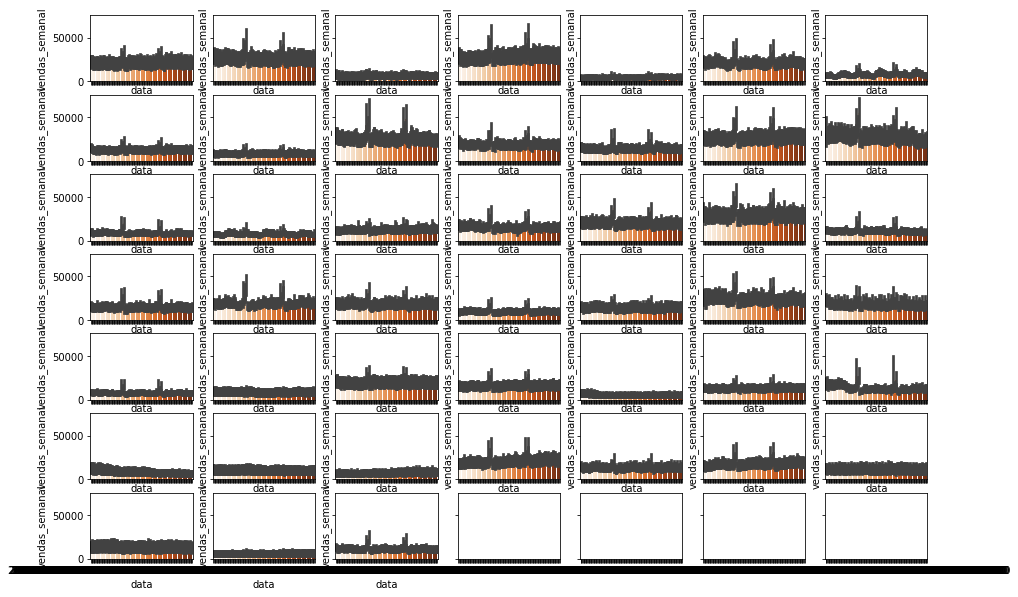

In [ ]:
fig, eixo = plt.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0,7):
    for j in range(0,7):
      a = vendas[vendas['loja'] == s]
      sns.barplot(x='data',y='vendas_semanal', data=a, palette='Oranges', ax=eixo[i,j])

      s += 1

fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Número', va='center', rotation='vertical')

Text(0.04, 0.5, 'Número')

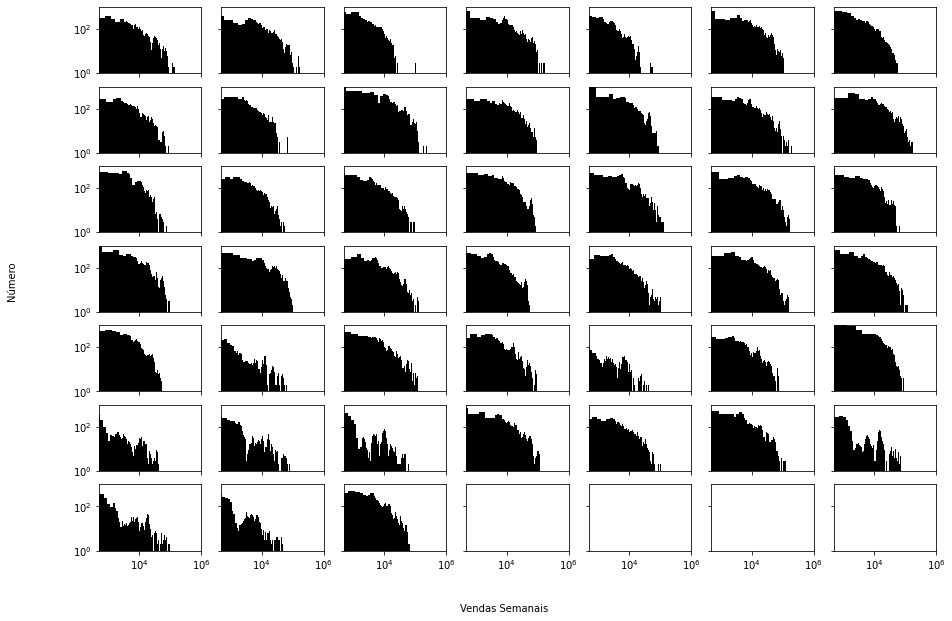

In [ ]:
fig, eixo = plt.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0,7):
    for j in range(0,7):
        a = vendas['vendas_semanal'].loc[vendas['loja'] == s] #filtro a coluna de vendas semanal de cada loja s (1-45), se tiver dúvida printa essa linha fora do for.
        ax= eixo[i,j].hist(x=a, bins=500, color=['black'] ) #colocar o parêmetro bins muito alto leva mais tempo para o códio rodar
        eixo[i,j].set_yscale('log') #tentei com 'linear' e a melhor visualização foi com log
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_ylim(1,1e3)
        eixo[i,j].set_xlim(5e2,1e6)

        s += 1

fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Número', va='center', rotation='vertical')

## **2.2 - Vendas Semanais incluindo semanas com e sem feriados**

### Sem feriados

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.04, 0.5, 'Número Normalizados')

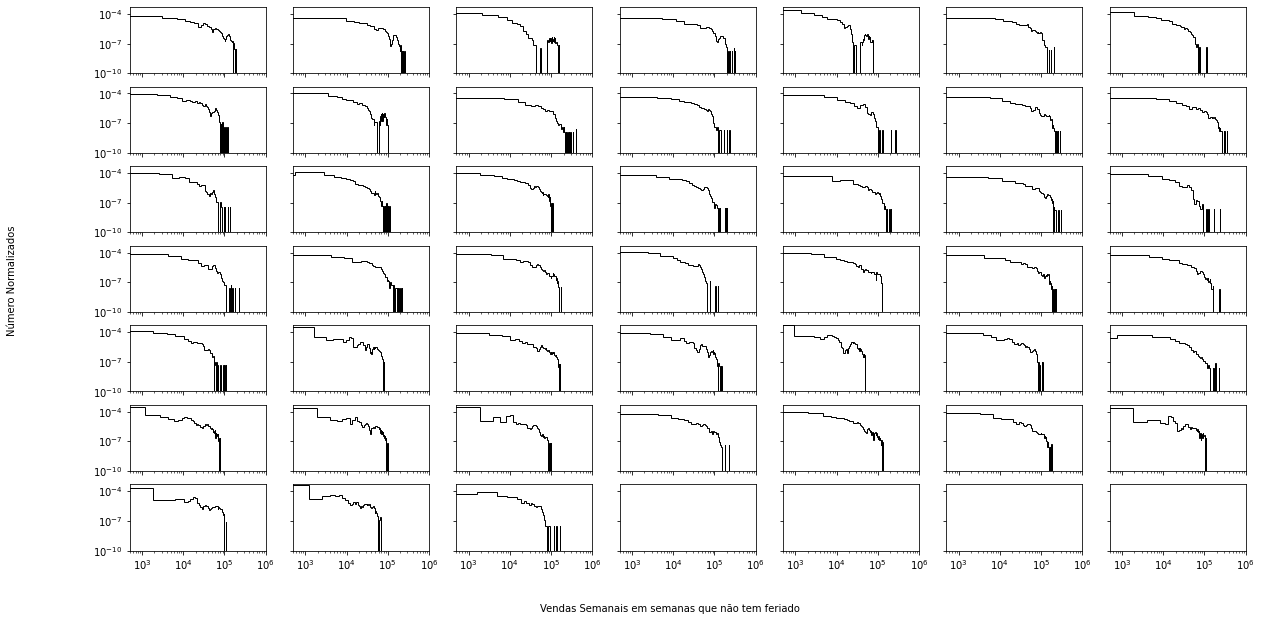

In [ ]:
fig, eixo = plt.subplots(7,7, sharex=True, sharey=True, figsize=(20,10))
s=1

for i in range(0,7):
  for j in range(0,7):
    a= vendas['vendas_semanal'].loc[(vendas.loja == s) & (vendas.feriado == False)]
    ax = eixo[i,j].hist(x=a, bins=50, color ='black', density=True,  histtype='step')
    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_ylim(1e-10,5e-4)
    eixo[i,j].set_xlim(5e2,1e6)

    s += 1
fig.text(0.5, 0.04, 'Vendas Semanais em semanas que não tem feriado', ha='center')
fig.text(0.04, 0.5, 'Número Normalizados', va='center', rotation='vertical')


### com feriados

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.04, 0.5, 'Número Normalizados')

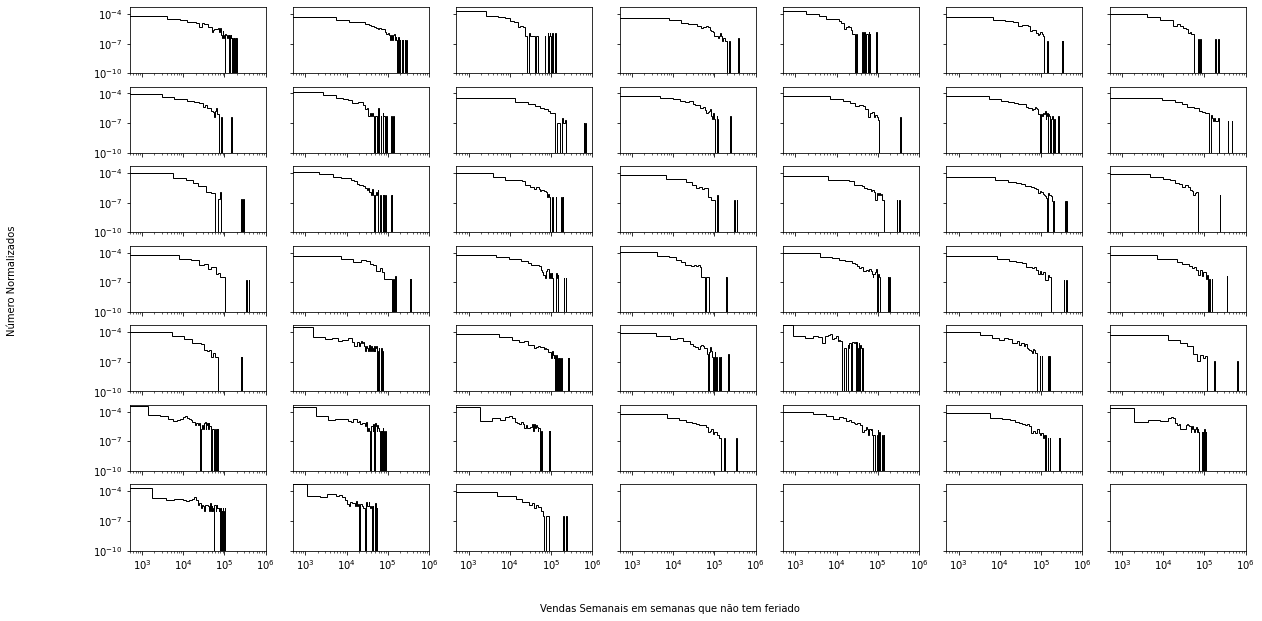

In [ ]:
fig, eixo = plt.subplots(7,7, sharex=True, sharey=True, figsize=(20,10))
s=1

for i in range(0,7):
  for j in range(0,7):
    a= vendas['vendas_semanal'].loc[(vendas.loja == s) & (vendas.feriado == True)] #só alterar para True em relação ao códogo anterior
    ax = eixo[i,j].hist(x=a, bins=50, color ='black', density=True,  histtype='step')
    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_ylim(1e-10,5e-4)
    eixo[i,j].set_xlim(5e2,1e6)

    s += 1
fig.text(0.5, 0.04, 'Vendas Semanais em semanas que não tem feriado', ha='center')
fig.text(0.04, 0.5, 'Número Normalizados', va='center', rotation='vertical')

### Comparando as vendas com e sem feriado

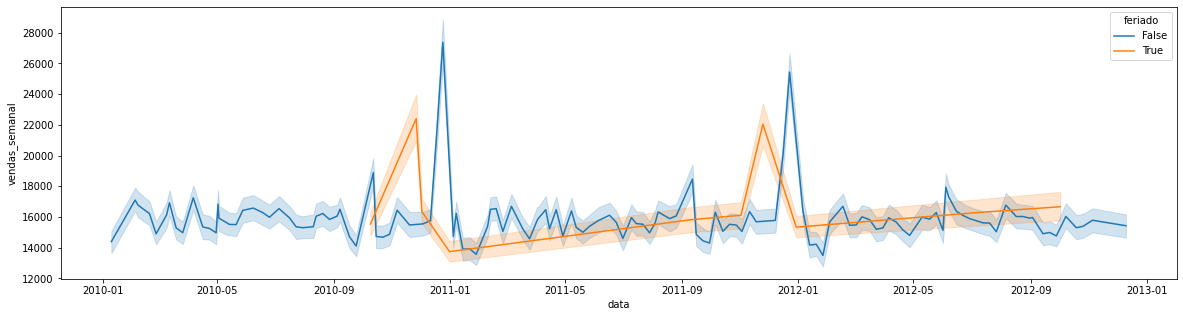

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(x='data', y='vendas_semanal', data=vendas, hue='feriado')


## **2.3 - Distribuição de vendas mensal para a loja 1 de maior faturamento loja incluindo todos os departamentos**

Podemos fazer o mesmo gráfico para outras lojas alterando o valor de s.

Text(0.04, 0.5, 'Number')

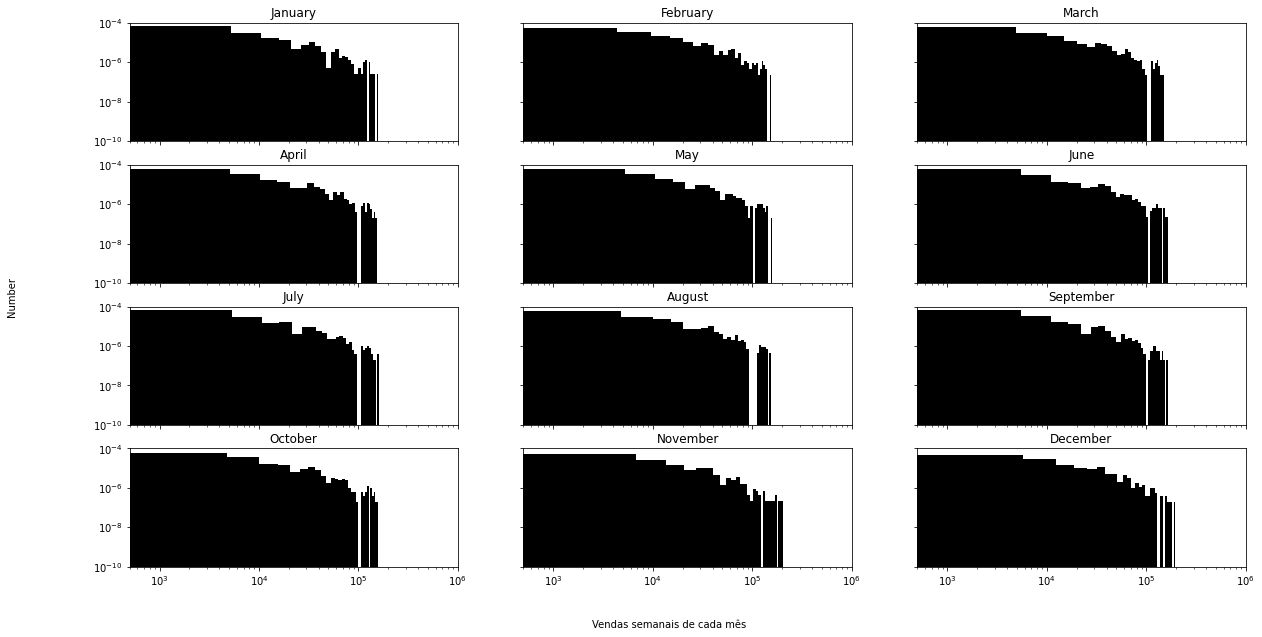

In [ ]:
fig, eixo= plt.subplots(4, 3, sharex=True, sharey=True,figsize=(20,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        a =vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.month == m)]#filtros nos meses

        ax= eixo[i,j].hist(x=a, bins=30, density=True, color='black')
        eixo[i,j].set_yscale('log')
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_xlim(5e2,1e6)
        eixo[i,j].set_ylim(1e-10,1e-4)
        eixo[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
        #s+=1 #se quiser fazer para todas as lojas
fig.text(0.5, 0.04, 'Vendas semanais de cada mês', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

## **2.4 - Distribuição mensal por loja 1  em 2010,2011, 2012**

Text(0.04, 0.5, 'Number')

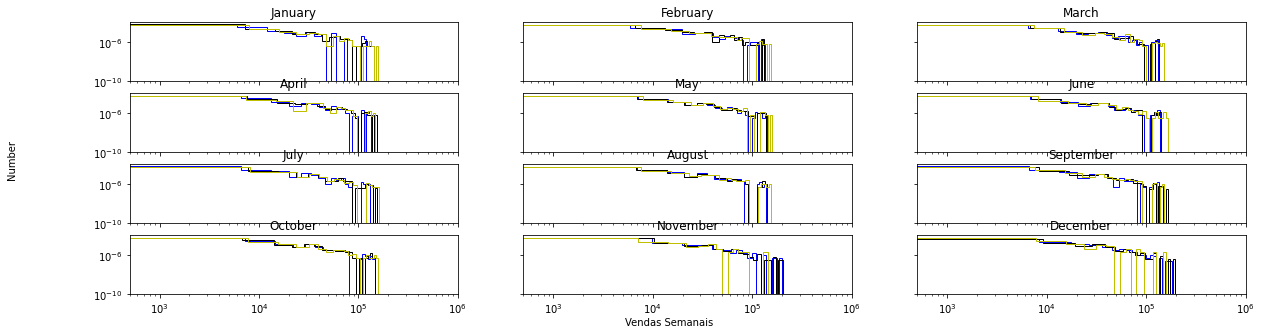

In [ ]:
fig, eixo = plt.subplots(4, 3, sharex=True, sharey=True,figsize=(20,5))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):

        a = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2010) & (vendas.data.dt.month == m)]      
        ax = eixo[i,j].hist(a, 20, color='b', histtype='step', density=True)

        b = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2011) & (vendas.data.dt.month == m)]
        ax = eixo[i,j].hist(b , 20, color='black',histtype='step', density=True)

        c = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2012) & (vendas.data.dt.month == m)]
        ax = eixo[i,j].hist(c, 20, color='y', histtype='step', density=True);

        eixo[i,j].set_yscale('log')
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_ylim(1e-10,1e-4)
        eixo[i,j].set_xlim(5e2,1e6)
        eixo[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
        #s += 1
fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

## **2.4 - Criando 4 categorias para as lojas baseado no tamanho no data set vendas**

In [ ]:
lojas['Grupo_tamanho'] = pd.cut(lojas['tamanho'], bins=4, labels=np.arange(1, 5)).astype(np.int) #cria uma coluna com  agrupando as lojas em 4 grupos de tamanho 0-1,1-2,2-3,3-4
lojas.head()

,Unnamed: 0,loja,tipo,tamanho,Grupo_tamanho
0,0,1,A,151315,3
1,1,2,A,202307,4
2,2,3,B,37392,1
3,3,4,A,205863,4
4,4,5,B,34875,1


In [ ]:
tamanho_loja_dict = lojas.set_index('loja').to_dict()['Grupo_tamanho'] # Cria um dicionário em qua a chave é o número de identificação da loja o valor é o grupo de tamanho
#tamanho_loja_dict

In [ ]:
tipo_loja_dict = lojas.set_index('loja').to_dict()['tipo'] # Cria um dicionário em qua a chave é o número de identificação da loja o valor é o tipo de loja
#tipo_loja_dict

In [ ]:
vendas['Grupo_tamanho'] = vendas['loja'] # cria a coluna e a preenche com o número de identificação da loja
vendas['Grupo_tamanho'] = vendas['Grupo_tamanho'].map(tamanho_loja_dict) # a coluna criada na linha anterior é preenchida com a categoria de tamanho baseada no dict
vendas['tipo'] = vendas['loja'].map(tipo_loja_dict) #Criando a coluna tipo com o dict 
vendas

,loja,Dept,data,vendas_semanal,feriado,Grupo_tamanho,tipo
0,1,1,2010-05-02,24924.50,False,3,A
1,1,1,2010-12-02,46039.49,True,3,A
2,1,1,2010-02-19,41595.55,False,3,A
3,1,1,2010-02-26,19403.54,False,3,A
4,1,1,2010-05-03,21827.90,False,3,A
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,2,B
421566,45,98,2012-05-10,628.10,False,2,B
421567,45,98,2012-12-10,1061.02,False,2,B
421568,45,98,2012-10-19,760.01,False,2,B


## **2. 5 - Soma das vendas semanais por mês de 2010 a 2012**

Text(0.04, 0.5, 'Número')

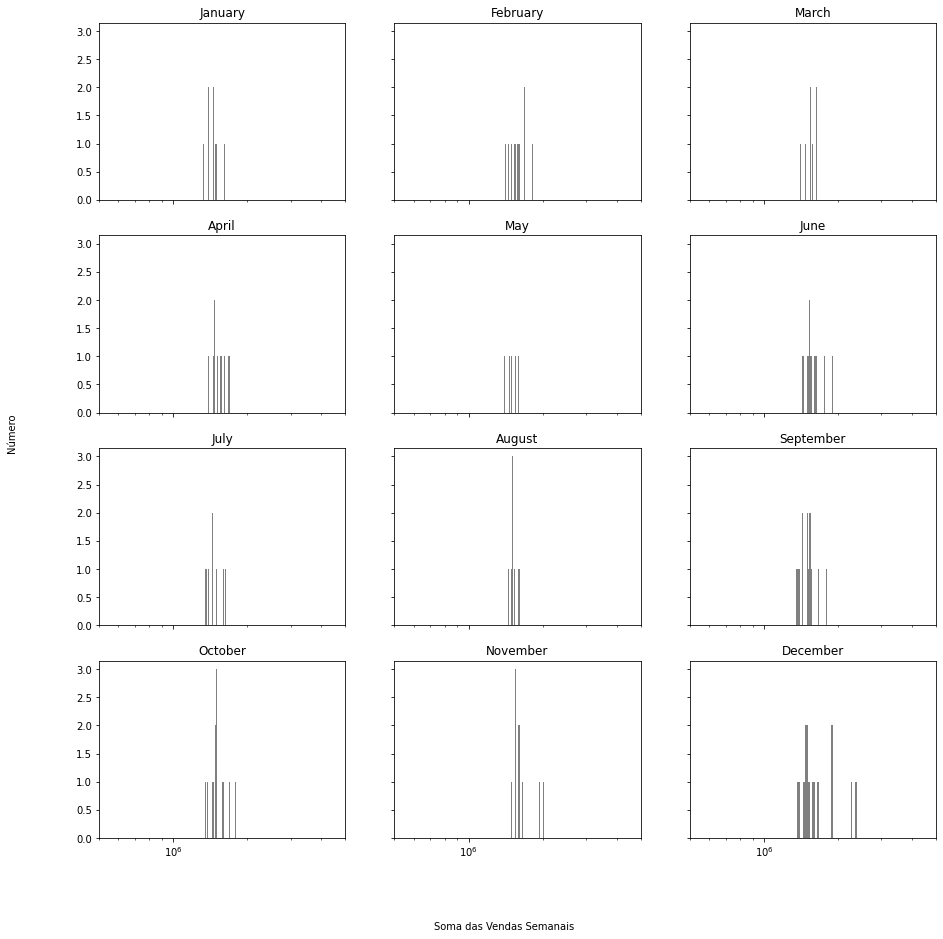

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,15))
s, m = 1,1

for i in range(0,4):
  for j in range(0,3):
    a = vendas.loc[(vendas.loja == s) & (vendas.data.dt.month == m)]
    a = a.groupby('data')['vendas_semanal'].sum().reset_index()
    ax = eixo[i,j].hist(a['vendas_semanal'], bins=30, color='grey')
    eixo[i,j].set_title('%s'%calendar.month_name[m])
    # eixo[i,j].set_xscale('log')
    # eixo[i,j].set_xlim(5e5,5e6)
    m += 1

fig.text(0.5,0.04,'Soma das Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Número', va='center', rotation='vertical')

## **2.6 - Vendas Mensais de 2010, 2011 e 2012 separaras**

Text(0.04, 0.5, 'Número')

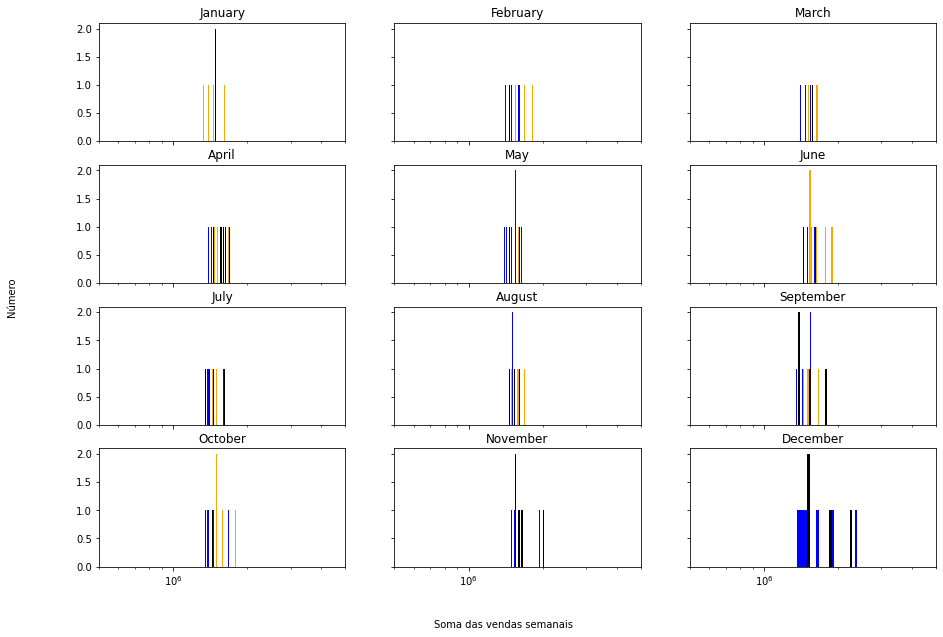

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(15,10))
s, m = 1,1 #se quiser variar a loja pode-se variar o valor de s

for i in range(0, 4):
    for j in range(0, 3):

      #2010
      a = vendas.loc[(vendas.loja == s) & (vendas.data.dt.month == m) & (vendas.data.dt.year == 2010)]
      a = a.groupby('data')['vendas_semanal'].sum().reset_index()
      ax = eixo[i,j].hist(a.vendas_semanal, bins=20, color= 'blue')
      #2011
      a = vendas.loc[(vendas.loja == s) & (vendas.data.dt.month == m) & (vendas.data.dt.year == 2011)]
      a = a.groupby('data')['vendas_semanal'].sum().reset_index()
      ax = eixo[i,j].hist(a.vendas_semanal, bins=20, color= 'black')
      #2012
      a = vendas.loc[(vendas.loja == s) & (vendas.data.dt.month == m) & (vendas.data.dt.year == 2012)]
      a = a.groupby('data')['vendas_semanal'].sum().reset_index()
      ax = eixo[i,j].hist(a.vendas_semanal, bins=20, color= 'orange')

      eixo[i,j].set_title('%s'%calendar.month_name[m])
      eixo[i,j].set_xscale('log')
      eixo[i,j].set_xlim(5e5,5e6)
      m += 1
        
fig.text(0.5, 0.04, 'Soma das vendas semanais', ha='center')
fig.text(0.04, 0.5, 'Número', va='center', rotation='vertical')

## **2.7 - Vendas Semanais por setor**

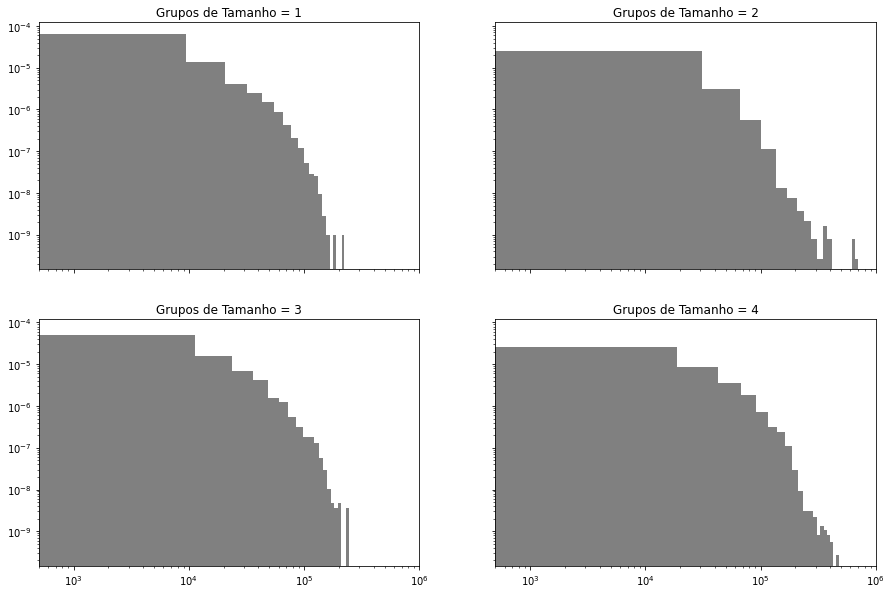

In [ ]:
fig, eixo = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))
s,m = 1,1

for i in range(0,2):
  for j in range(0,2):
    a = vendas.vendas_semanal.loc[(vendas.Grupo_tamanho == m)]
    ax= eixo[i,j].hist(x=a, bins=20, density=True, color='grey')
    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_xlim(5e2, 1e6)
    eixo[i,j].set_title('Grupos de Tamanho = %d'%m)
    m += 1

## **2.8 -  Vendas Semanais por feriado no final de semana e tamaho das lojas**
A distribuição das vendas semanais depende da existêndia ou não do feriado

In [ ]:
fig, axarr = pl.subplots(2, 2, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 2):
    for j in range(0, 2):
        xxx = axarr[i,j].hist(sales_data['Weekly_Sales'].loc[(sales_data['SizeBand'] == m) & 
                             (sales_data['IsHoliday'] == False)], 50, color='b', 
                              normed=True, histtype='step')
        xxx = axarr[i,j].hist(sales_data['Weekly_Sales'].loc[(sales_data['SizeBand'] == m) & 
                             (sales_data['IsHoliday'] == True)], 50, color='r', 
                              normed=True, histtype='step')
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        #axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_xlim(5e2,1e6)

        m += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Normalized umber (Red/Blue:Holiday/Non)', va='center', rotation='vertical'

Text(0.04, 0.5, 'Número normalizado (Black/Orange:Feriado/Não é feriado)')

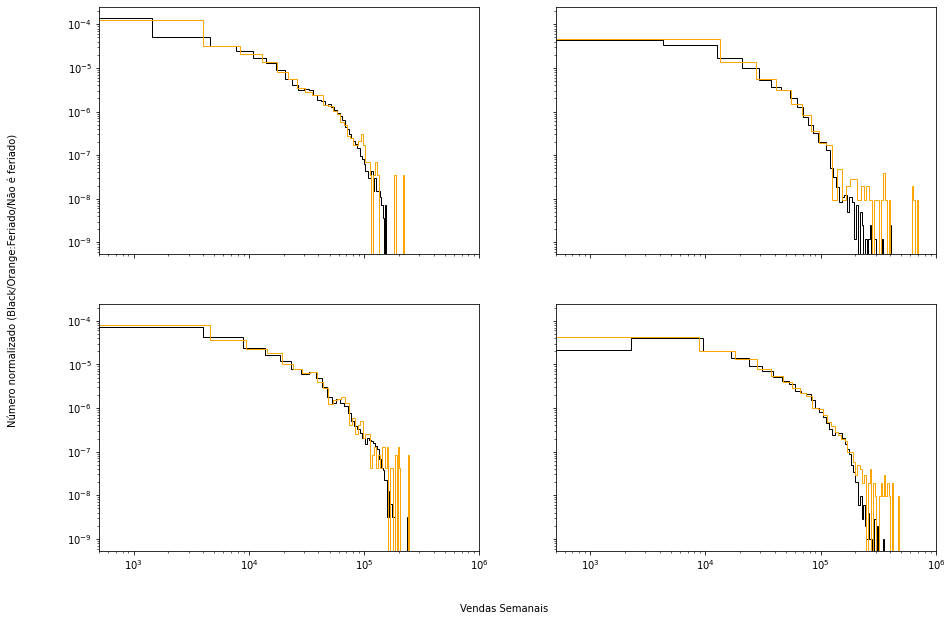

In [ ]:
fig, eixo = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))
s, m = 1,1

for i in range(0,2):
  for j in range(0,2):
    a = vendas.vendas_semanal.loc[(vendas.Grupo_tamanho == m) & (vendas.feriado == False)]
    ax= eixo[i,j].hist(x=a, bins=50, color='black', density=True, histtype='step')

    a= vendas.vendas_semanal.loc[(vendas.Grupo_tamanho == m) & (vendas.feriado == True)]
    ax= eixo[i,j].hist(x=a, bins=50, color='orange', density=True, histtype='step')

    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_xlim(5e2,1e6)

    m += 1

fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Número normalizado (Black/Orange:Feriado/Não é feriado)', va='center', rotation='vertical')

## **2.9 - Distribuições das vendas semanais por tamanho e feriado**
Não há diferença entre as distribuições de vendas semanais para pequenas lojas mesmo se dividirmos as lojas por tipos. Mas há uma pequena diferença entre as distribuições para grandes lojas.

Text(0.04, 0.5, 'Número Normalizado(Grey/Green: Não Feriado/Feriado')

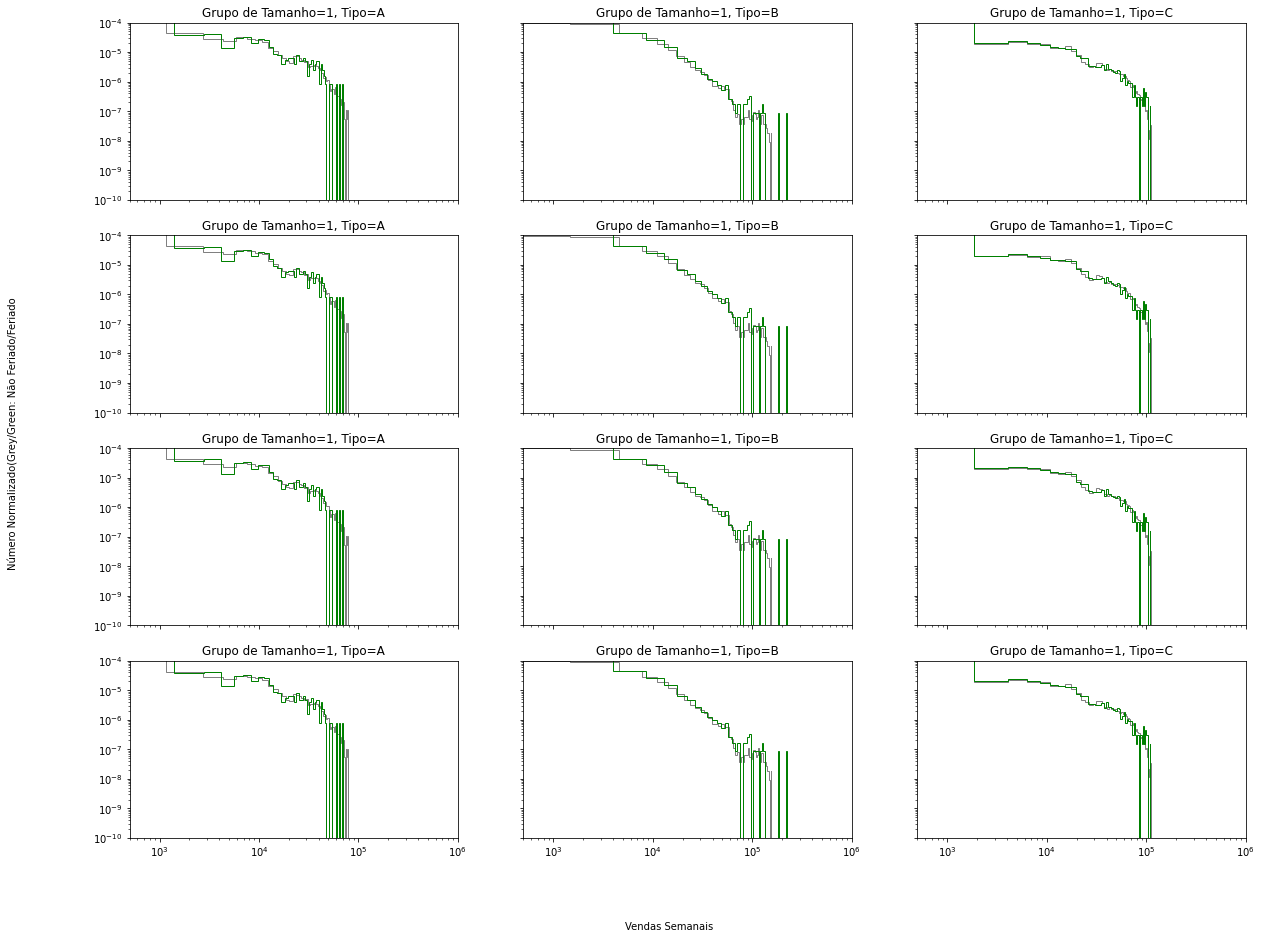

In [ ]:
fig, eixo = plt.subplots(4,3, sharex=True, sharey=True, figsize=(20,15))
s,m = ['A','B','C'], 1

for i in range(0,4):
  for j in range(0,3):

    a = vendas['vendas_semanal'].loc[(vendas.Grupo_tamanho == m) & (vendas.tipo == s[j]) & (vendas.feriado == False)]
    ax= eixo[i,j].hist(x=a, bins=50, density=True, color='gray', histtype='step')

    a = vendas['vendas_semanal'].loc[(vendas.Grupo_tamanho == m) & (vendas.tipo == s[j]) & (vendas.feriado == True)]
    ax= eixo[i,j].hist(x=a, bins=50, density=True, color='Green', histtype='step')

    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_ylim(1e-10,1e-4)
    eixo[i,j].set_xlim(5e2,1e6)
    eixo[i,j].set_title('Grupo de Tamanho=%d, Tipo=%s'%(m, s[j]))

fig.text(0.5,0.04, 'Vendas Semanais', ha='center')
fig.text(0.04,0.5,"Número Normalizado(Grey/Green: Não Feriado/Feriado", va='center', rotation='vertical')

## **2.10 - Combinando as variáveis dos datasets features e vendas**

In [ ]:
vendas_features = vendas.merge(features, left_on=('loja',"data"), right_on=('loja', 'data'), how= 'left' ) #juntando as duas tabelas pelos Id da loja e a data
vendas_features.head()

,loja,Dept,data,vendas_semanal,feriado_x,Grupo_tamanho,tipo,temperatura,preco_combustivel,desc_1,desc_2,desc_3,desc_4,desc_5,IPC,desemprego,feriado_y
0,1,1,2010-05-02,24924.50,False,3,A,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-12-02,46039.49,True,3,A,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,3,A,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,3,A,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-05-03,21827.90,False,3,A,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
vendas_features.columns # oluna feriado duplicada

Index(['loja', 'Dept', 'data', 'vendas_semanal', 'feriado_x', 'Grupo_tamanho',
       'tipo', 'temperatura', 'preco_combustivel', 'desc_1', 'desc_2',
       'desc_3', 'desc_4', 'desc_5', 'IPC', 'desemprego', 'feriado_y'],
      dtype='object')

In [ ]:
vendas_features = vendas_features.drop(['feriado_y'], axis=1) #removendo a coluna feriado
vendas_features = vendas_features.rename(columns = {'feriado_x':'feriado'}) # renomeando
vendas_features['feriado'] = vendas_features['feriado'].astype(int) #passando os valores para 0 e 1

In [ ]:
#matriz de correlação
corr = vendas_features.drop(['loja','Dept'], axis=1).corr()
corr

,vendas_semanal,feriado,Grupo_tamanho,temperatura,preco_combustivel,desc_1,desc_2,desc_3,desc_4,desc_5,IPC,desemprego
vendas_semanal,1.000000,0.012774,0.235637,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864
feriado,0.012774,1.000000,0.000534,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460
Grupo_tamanho,0.235637,0.000534,1.000000,-0.032583,-0.010637,0.324046,0.098255,0.043154,0.159050,0.310334,0.059965,-0.072915
temperatura,-0.002312,-0.155949,-0.032583,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730
preco_combustivel,-0.000120,-0.078281,-0.010637,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853
desc_1,0.085251,-0.035586,0.324046,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285
desc_2,0.024130,0.334818,0.098255,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940
desc_3,0.060385,0.427960,0.043154,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818
desc_4,0.045414,-0.000562,0.159050,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963
desc_5,0.090362,-0.053719,0.310334,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843


In [ ]:
#mask que deix aem foma de triângulo
mask=np.zeros_like(corr,dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

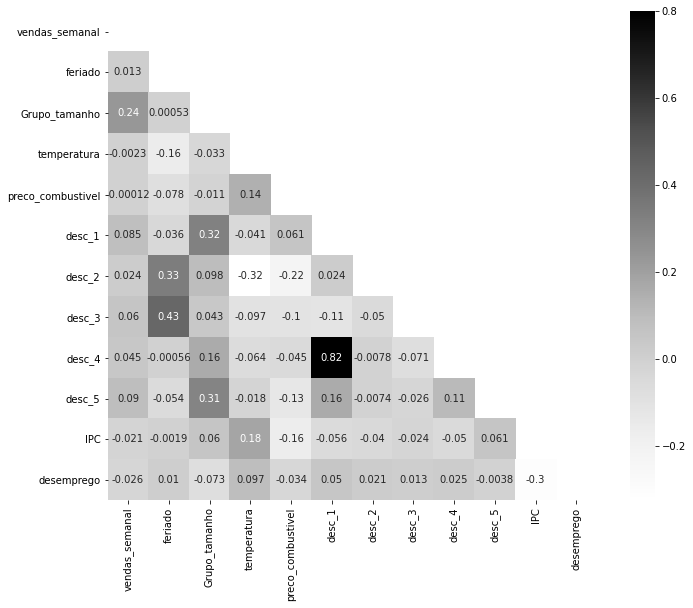

In [ ]:
#matriz de correlação
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True, cmap='Greys')

How the type of stores have correlation: Similar conclusions for A and B type of stores can be derived. There are slight difference between these conclusion and C type stores

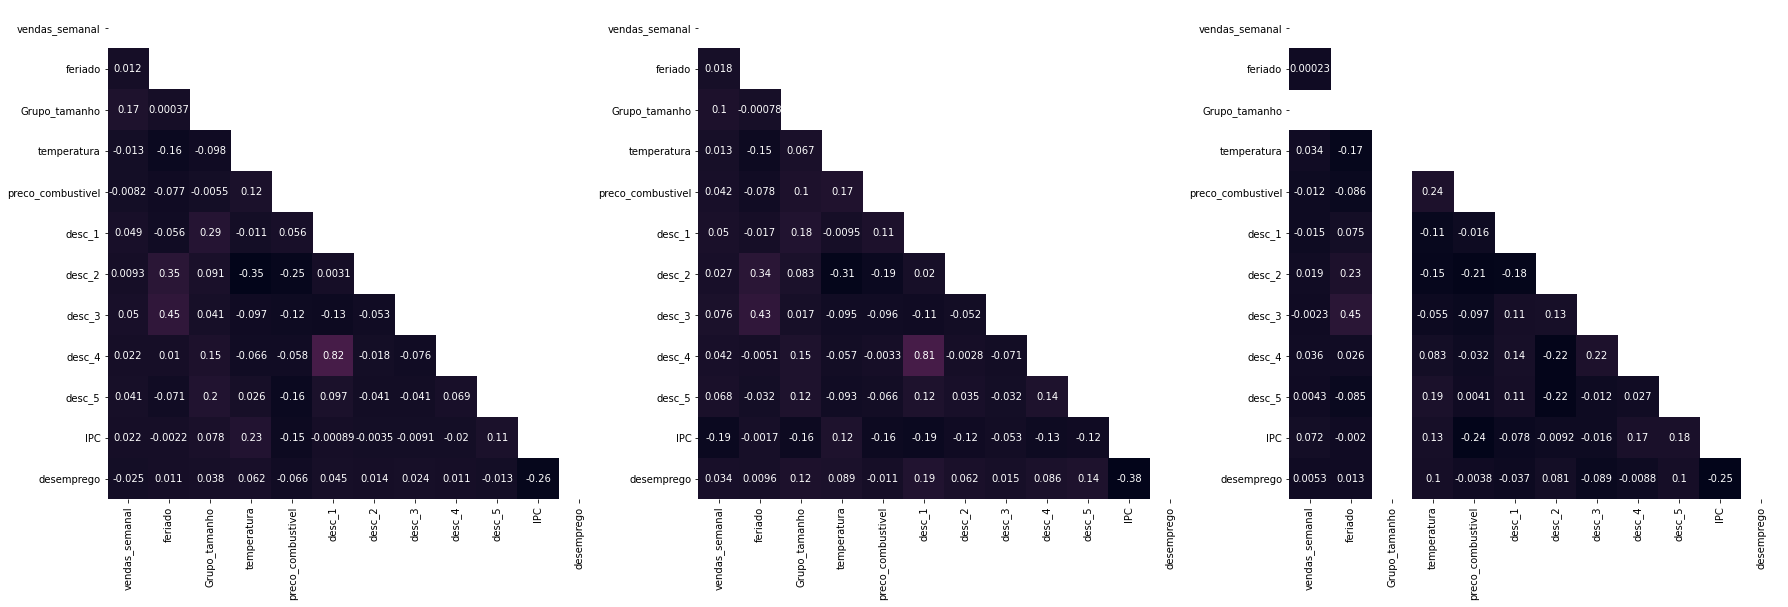

In [ ]:

# sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1)[sales_feature.Type == 'B'].corr(), mask=mask, vmax=.6, 
#             square=True, ax=axarr[1], cbar=None);
# sns.heatmap(sales_feature.drop(['Store', 'Dept'], axis=1)[sales_feature.Type == 'C'].corr(), mask=mask, vmax=.6, 
#             square=True, ax=axarr[2], cbar=None);

# matriz de correlação
fig, eixo = plt.subplots(1,3, figsize=(30,30))

a = vendas_features.drop(['loja','Dept'], axis=1)[vendas_features.tipo == 'A'].corr()
sns.heatmap(a , mask= mask, vmax=6, annot=True, square=True, ax= eixo[0], cbar=None)

a = vendas_features.drop(['loja','Dept'], axis=1)[vendas_features.tipo == 'B'].corr()
sns.heatmap(a , mask= mask, vmax=6, annot=True, square=True, ax= eixo[1], cbar=None )

a = vendas_features.drop(['loja','Dept'], axis=1)[vendas_features.tipo == 'C'].corr()
sns.heatmap(a , mask= mask, vmax=6, annot=True, square=True, ax= eixo[2], cbar=None)

#  **3 - Teste para verificação de estacionaridade**
Estacionaridade 
Quanto mais negativo for, mais temos certeza que a série é estacionária, pvalue <.05. 


In [98]:
a = vendas[vendas.loja == 22][['data','vendas_semanal']]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9688 entries, 207131 to 216818
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            9688 non-null   datetime64[ns]
 1   vendas_semanal  9688 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 227.1 KB


In [86]:
a['rolling_mean'] = a.vendas_semanal.rolling(window=12).mean()/a.vendas_semanal.rolling(window=12).std()
a['rolling_meanII'] = a.rolling_mean - a.rolling_mean.shift(12)
a


,data,vendas_semanal,rolling_mean,rolling_meanII
207131,2010-05-02,20686.31,NaN,NaN
207132,2010-12-02,36372.35,NaN,NaN
207133,2010-02-19,23035.70,NaN,NaN
207134,2010-02-26,14843.93,NaN,NaN
207135,2010-05-03,19011.63,NaN,NaN
...,...,...,...,...
216814,2012-05-10,427.25,1.366386,0.312869
216815,2012-12-10,247.46,1.490345,0.412986
216816,2012-10-19,390.40,1.462894,0.343081
216817,2012-10-26,229.21,1.642095,0.589320


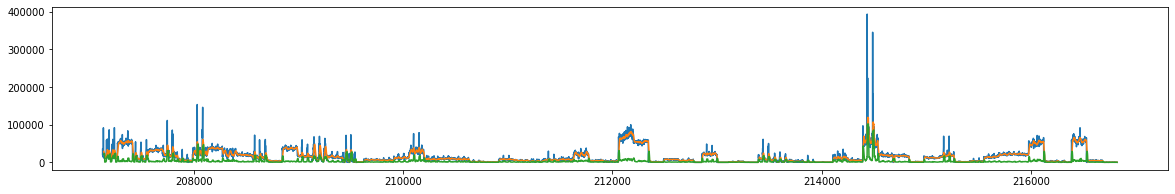

In [101]:
plt.figure(figsize=(20,3))
a.vendas_semanal.plot()
a.vendas_semanal.rolling(window=12).mean().plot()
a.vendas_semanal.rolling(window=12).std().plot()


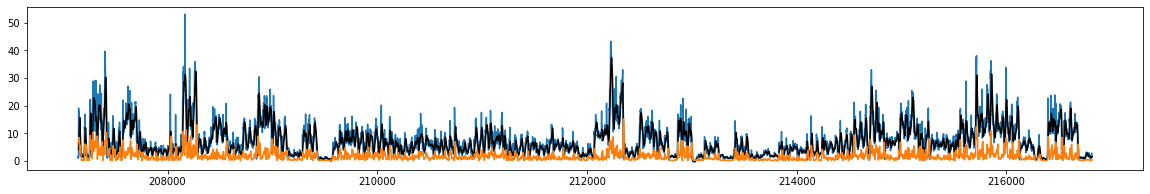

In [88]:
plt.figure(figsize=(20,3))
a.rolling_mean.plot()
a.rolling_mean.rolling(window=12).mean().plot(color='black')
a.rolling_mean.rolling(window=12).std().plot()

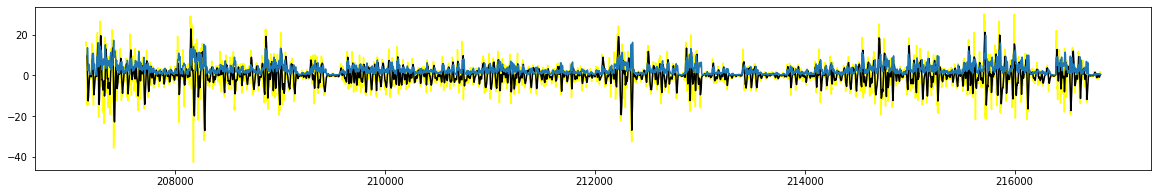

In [89]:
plt.figure(figsize=(20,3))
a.rolling_meanII.plot(color='yellow')
a.rolling_meanII.rolling(window=12).mean().plot(color='black')
a.rolling_meanII.rolling(window=12).std().plot()

In [ ]:
#def plot_rolling(df):

fig, ax = plt.subplots(3,figsize=(12, 9))

ax[0].plot(a.data, a.vendas_semanal, label='raw data')
ax[0].plot(a.data, a.vendas_semanal.rolling(window=12).mean(), label="rolling mean");
# ax[0].plot(a.vendas_semanal.rolling(window=12).std(), label="rolling std (x10)");
# ax[0].legend()

    # ax[1].plot(a.data, a.vendas_semanal, label="de-trended data")
    # ax[1].plot(a.vendas_semanal.rolling(window=12).mean(), label="rolling mean");
    # ax[1].plot(a.vendas_semanal.rolling(window=12).std(), label="rolling std (x10)");
    # ax[1].legend()

    # ax[2].plot(a.data, a.vendas_semanal, label="12 lag differenced de-trended data")
    # ax[2].plot(a.vendas_semanal.rolling(window=12).mean(), label="rolling mean");
    # ax[2].plot(a.vendas_semanal.rolling(window=12).std(), label="rolling std (x10)");
    # ax[2].legend()

    # plt.tight_layout()
    # fig.autofmt_xdate()

In [ ]:
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
vendas.vendas_semanal.values

NameError: ignored

In [ ]:
adf = adfuller(vendas.vendas_semanal.values)

## **Sazonalidade**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x360 with 0 Axes>

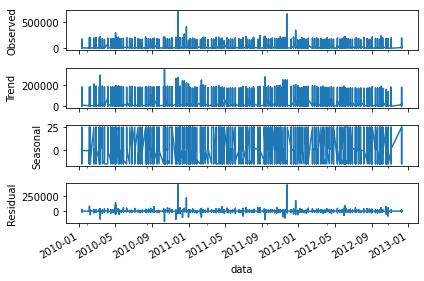

In [ ]:
a = tendencia[['data', 'vendas_semanal']]
plt.figure(figsize=(20,5))
result_c = seasonal_decompose(a.set_index('data'), freq=5)
result_c.plot(); #; para nçao duplicar o gráfico

Notamos nos gráficos que não há uma tendência no aumento das vendas. Aparentemente a empresa não está crescendo. Também notamos que há alguns picos nas vendas, vamos verificar se é sazonalidade.

# **3 - Analisando Crescimento**

In [24]:
tendencia = vendas.copy()
tendencia['crescimento'] = vendas.vendas_semanal.diff()
tendencia['aceleracao'] = tendencia.crescimento.diff()
tendencia.head()

,loja,Dept,data,vendas_semanal,feriado,crescimento,aceleracao
0,1,1,2010-05-02,24924.50,False,NaN,NaN
1,1,1,2010-12-02,46039.49,True,21114.99,NaN
2,1,1,2010-02-19,41595.55,False,-4443.94,-25558.93
3,1,1,2010-02-26,19403.54,False,-22192.01,-17748.07
4,1,1,2010-05-03,21827.90,False,2424.36,24616.37


In [25]:
def plotar(titulo, labelx,labely, x,y,dataset):
  # sns.set_palette('Accent')
  # sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(20,6)
  ax.set_title(titulo, loc= 'left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax=ax

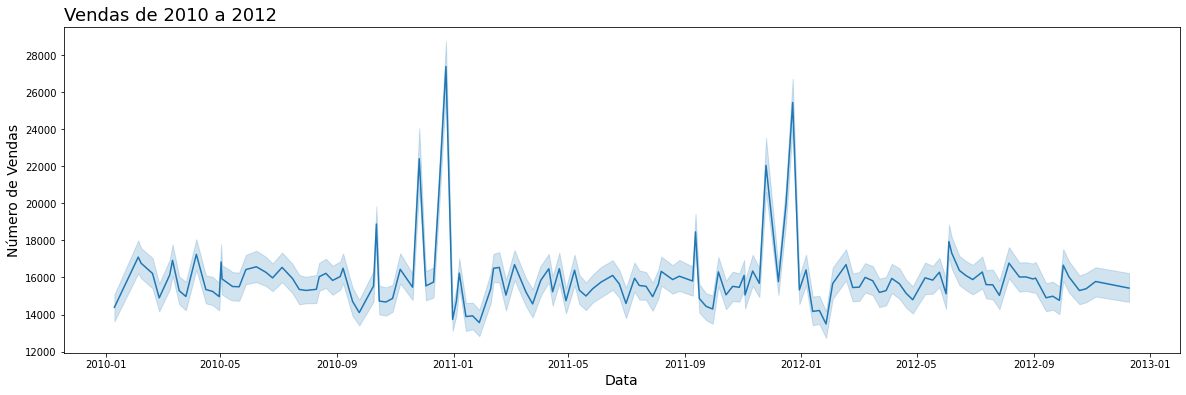

In [ ]:
plotar('Vendas de 2010 a 2012', 'Data', 'Número de Vendas','data','vendas_semanal', tendencia )

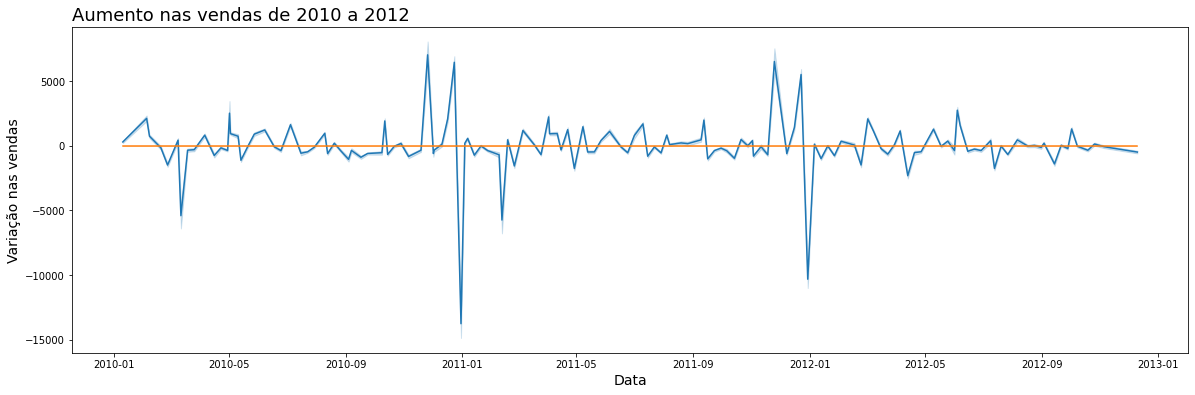

In [ ]:
plotar("Aumento nas vendas de 2010 a 2012", 'Data', 'Variação nas vendas','data','crescimento',tendencia)
sns.lineplot(x='data', y=tendencia.crescimento.mean(), data=tendencia)

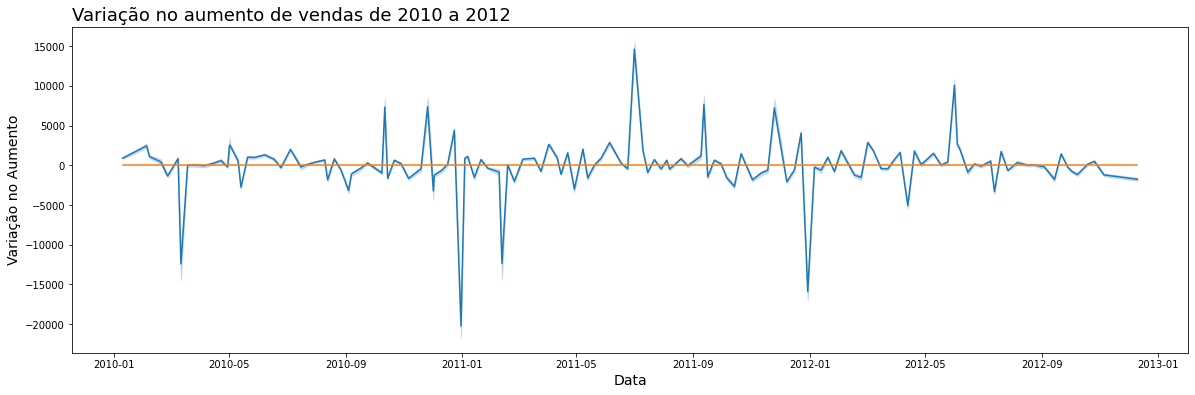

In [ ]:
plotar('Variação no aumento de vendas de 2010 a 2012', 'Data', 'Variação no Aumento','data','aceleracao', tendencia )
sns.lineplot(x='data', y=tendencia.aceleracao.mean(), data=tendencia)

# **Modelos Autorregressivos**